# Installing the required Libraries

In [2]:
!pip install darts pandas matplotlib

# Importing the necessary libraries and modules

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import ExponentialSmoothing, Prophet, ARIMA
from darts.metrics import mape

# Loading and visualizing the dataset

In [13]:
# Load the AirPassengers dataset from darts
series = TimeSeries.from_dataframe(pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'),
                                   'Month', 'Passengers')  # Update column name here

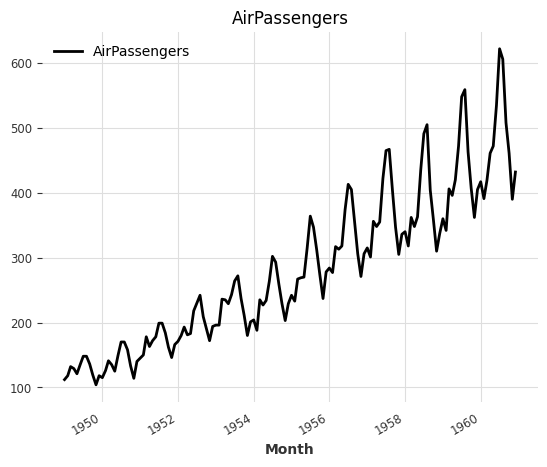

In [14]:
# Visualize the time series
series.plot(label='AirPassengers')
plt.title('AirPassengers')
plt.legend()
plt.show()

# Exploratory Data Analysis (EDA)

In [16]:
# Perform a simple train-test split
train, val = series.split_before(pd.Timestamp('1958-01-01'))

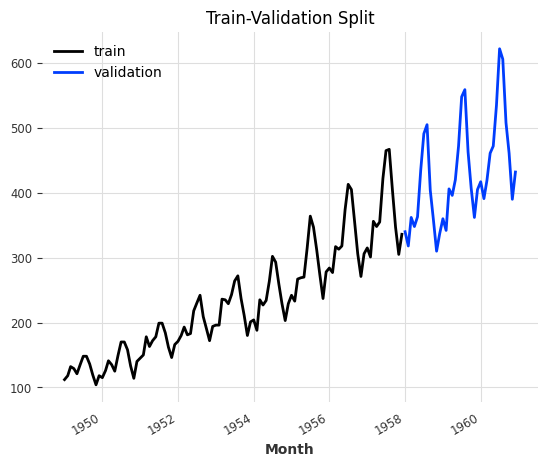

In [17]:
# Visualize the train and validation sets
train.plot(label='train')
val.plot(label='validation')
plt.title('Train-Validation Split')
plt.legend()
plt.show()

# Model Training and Forecasting

In [18]:
# Initialize and fit the model
model = ExponentialSmoothing()
model.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [19]:
#Perform a forecast for the validation set
forecast = model.predict(len(val))

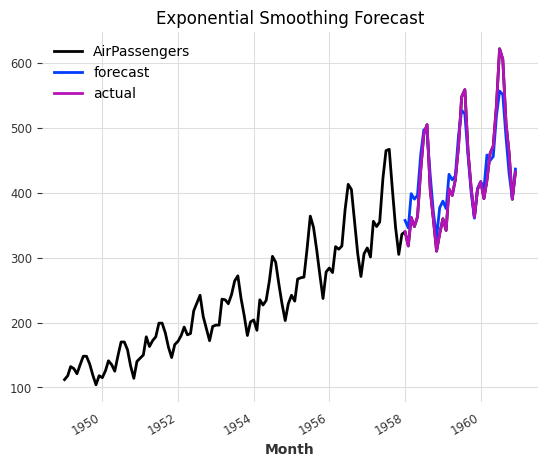

In [20]:
# Visualize the forecast and actual values
series.plot(label='AirPassengers')
forecast.plot(label='forecast')
val.plot(label='actual')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [21]:
# Evaluate the forecast using Mean Absolute Percentage Error (MAPE)
print(f"MAPE: {mape(forecast, val):.2f}%")

MAPE: 4.96%


In [26]:
# Initialize and fit the Exponential Smoothing model
exp_model = ExponentialSmoothing()
exp_model.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0)

In [27]:
# Perform a forecast for the validation set using Exponential Smoothing
exp_forecast = exp_model.predict(len(val))

In [28]:
# Initialize and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(train)

18:12:37 - cmdstanpy - INFO - Chain [1] start processing
18:12:37 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

In [31]:
# Perform a forecast for the validation set using Prophet
prophet_forecast = prophet_model.predict(len(val))

In [33]:
# Initialize and fit the ARIMA model
arima_model = ARIMA()
arima_model.fit(train)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(p=12, d=1, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=0, add_encoders=None)

In [34]:
# Perform a forecast for the validation set using ARIMA
arima_forecast = arima_model.predict(len(val))

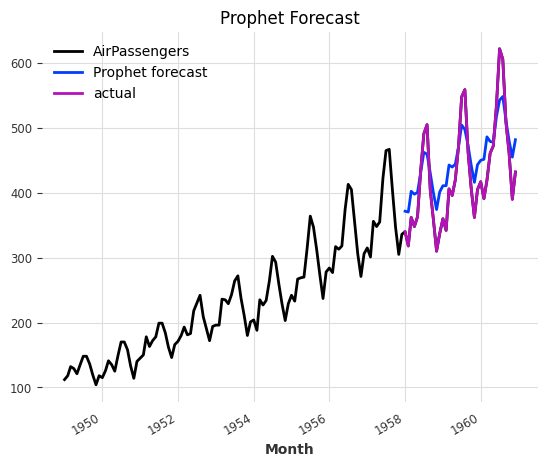

In [35]:
# Visualize the forecast and actual values for Prophet
series.plot(label='AirPassengers')
prophet_forecast.plot(label='Prophet forecast')
val.plot(label='actual')
plt.title('Prophet Forecast')
plt.legend()
plt.show()

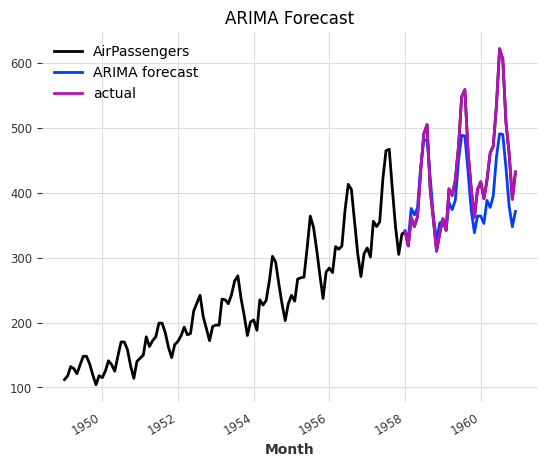

In [36]:
# Visualize the forecast and actual values for ARIMA
series.plot(label='AirPassengers')
arima_forecast.plot(label='ARIMA forecast')
val.plot(label='actual')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [37]:
print(f"Prophet MAPE: {mape(prophet_forecast, val):.2f}%")

Prophet MAPE: 9.01%


In [38]:
print(f"ARIMA MAPE: {mape(arima_forecast, val):.2f}%")

ARIMA MAPE: 9.29%
